## Now, let us use what we learned through the MPT model and use real data to get the optimal portfolio for 3 stocks I invest in. For this model, I will use the month return of the stocks.

In [24]:
from alpha_vantage.timeseries import TimeSeries

import datetime
import pandas as pd
from key import key

TODAY = datetime.date.today()
ONE_WEEK = datetime.timedelta(days=7)
ONE_DAY = datetime.timedelta(days=1)
 

def save_dataset(symbol,days):
    api_key = key
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol, outputsize='full')
    data = data.shift(periods=days, freq=None, axis=0, fill_value=0)
    data = data.shift(periods=days, freq="D")
    data.to_csv(f'./{symbol}_daily.csv')

save_dataset('VXUS',1)
save_dataset('VTI',1)
save_dataset('BBUS',1)

In [25]:
monthly_vxus = pd.read_csv('VXUS_daily.csv', nrows = 66)
monthly_vxus = monthly_vxus.drop([0])
monthly_vti = pd.read_csv('VTI_daily.csv', nrows = 66)
monthly_vti = monthly_vti.drop([0])
monthly_bbus = pd.read_csv('BBUS_daily.csv', nrows = 66)
monthly_bbus = monthly_bbus.drop([0])



In [26]:
print(monthly_vxus)

          date  1. open  2. high   3. low  4. close  5. volume
1   2021-10-23   65.500  65.6350  65.2900     65.55  2118272.0
2   2021-10-22   65.510  65.7390  65.2300     65.48  2412334.0
3   2021-10-21   65.220  65.4250  65.1700     65.28  2856510.0
4   2021-10-20   65.560  65.7450  65.4550     65.67  2097465.0
5   2021-10-19   65.320  65.5450  65.2700     65.50  2345399.0
..         ...      ...      ...      ...       ...        ...
61  2021-07-30   64.960  65.2100  64.7550     64.94  2499161.0
62  2021-07-29   65.384  65.4600  65.2850     65.32  2212919.0
63  2021-07-28   64.500  65.0300  64.3681     64.92  2919667.0
64  2021-07-27   64.170  64.2350  63.7950     64.23  4227361.0
65  2021-07-24   64.600  64.8484  64.5700     64.80  2365902.0

[65 rows x 6 columns]


In [27]:
monthly_vxus['return'] = monthly_vxus['4. close'].pct_change()

In [28]:
print(monthly_vxus)

          date  1. open  2. high   3. low  4. close  5. volume    return
1   2021-10-23   65.500  65.6350  65.2900     65.55  2118272.0       NaN
2   2021-10-22   65.510  65.7390  65.2300     65.48  2412334.0 -0.001068
3   2021-10-21   65.220  65.4250  65.1700     65.28  2856510.0 -0.003054
4   2021-10-20   65.560  65.7450  65.4550     65.67  2097465.0  0.005974
5   2021-10-19   65.320  65.5450  65.2700     65.50  2345399.0 -0.002589
..         ...      ...      ...      ...       ...        ...       ...
61  2021-07-30   64.960  65.2100  64.7550     64.94  2499161.0 -0.004140
62  2021-07-29   65.384  65.4600  65.2850     65.32  2212919.0  0.005852
63  2021-07-28   64.500  65.0300  64.3681     64.92  2919667.0 -0.006124
64  2021-07-27   64.170  64.2350  63.7950     64.23  4227361.0 -0.010628
65  2021-07-24   64.600  64.8484  64.5700     64.80  2365902.0  0.008874

[65 rows x 7 columns]


In [29]:
monthly_vti['return'] = monthly_vti['4. close'].pct_change()
monthly_bbus['return'] = monthly_bbus['4. close'].pct_change()

In [30]:
vxus = list(monthly_vxus['return'])
vxus = vxus[1:66]

In [31]:
vti = list(monthly_vti['return'])
vti = vti[1:66]
bbus = list(monthly_bbus['return'])
bbus = bbus[1:66]

In [32]:
from MPT import expected_value, expected_return_port, risk_port, randWeights, makeFrontier, port_ret_cml, makeCML_ef

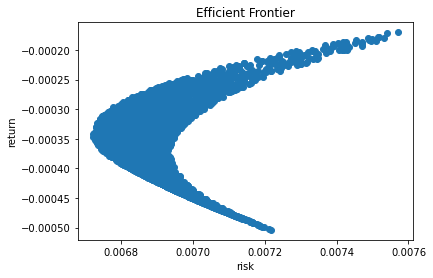

In [33]:
portfolio = [vxus,vti,bbus]
makeFrontier(portfolio)

In [34]:
def getOptimal(stock_vecs,risk_tol):
    for i in range(6000):
        weights = randWeights(len(stock_vecs))
        exp = expected_return_port(weights, stock_vecs)
        risk = risk_port(weights, stock_vecs)
        if i == 0:
            optWeights = weights
            best = exp
            optExp = exp
            optRisk = risk
        else:
            if exp > best:
                if risk < risk_tol: 
                    optWeights = weights
                    best = exp
                    optExp = exp
                    optRisk = risk          
    print("The optimal strategy would be:", weights)
    print("The optimal strategy return would be:", optExp)
    print("The optimal strategy risk would be:", optRisk)
    return weights
        

In [35]:
getOptimal(portfolio,.1)

The optimal strategy would be: [0.18217974371466614, 0.41608283325102824, 0.4017374230343056]
The optimal strategy return would be: -0.0001515779118068985
The optimal strategy risk would be: 0.00772454407776648


[0.18217974371466614, 0.41608283325102824, 0.4017374230343056]

### Potential improvements: make it so that the risk is calculated using a longer time horizon than the expected return?